('condition number', 0.52276596750201776)
1.96362143673


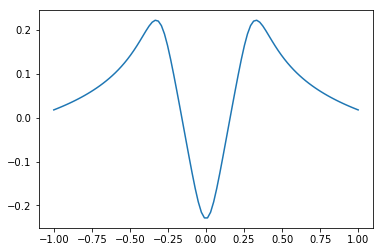

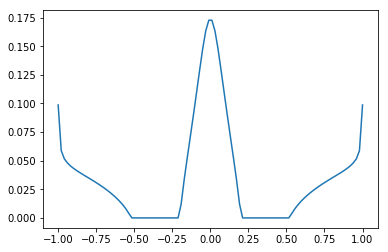

In [82]:
# playing with iterative thomas fermi calculations
# fixed mu everywhere
# It is really correct to think of mu as a function of position?

import sys
import imp
sys.path.append("/Users/ssk4/quantum-ml/ndot/lib/")
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import potential_profile
imp.reload(potential_profile)
import thomas_fermi
imp.reload(thomas_fermi)

b1 = (-200e-3,-0.3,0.1,1.0)
d = (300e-3,0.0,0.1,1.0)
b2 = (-200e-3,0.3,0.1,1.0)
N_grid = 100
x = np.linspace(-1,1,N_grid)
list_b = [b1,d,b2]

V = potential_profile.V_x_wire(x,list_b)
E_scale = 10e-3
sigma = x[1] - x[0]
x_0 = 10*(x[1] - x[0])
K = thomas_fermi.create_K_matrix(x,E_scale,sigma,x_0)
C_k = 0.1
mu = 150e-3

n = np.zeros(N_grid)


def energy(n,mu,V,K,C_k):
    return np.sum((V - mu)*n) + 0.5*np.sum(n*np.dot(K,n)) + C_k*np.sum(np.power(n,5.0/3.0))

import scipy.optimize
n_root = scipy.optimize.minimize(lambda x : energy(x,mu,V,K,C_k),n,bounds=[(0,None)]*len(n))


cond = (5.0*C_k)/(3.0 * np.power(K[0,0],2.0/3) * np.power(mu-V[0],1.0/3))
print("condition number",cond)
plt.figure(1)
plt.plot(x,V)
plt.figure(2)
plt.plot(x,n_root.x)

print(np.sum(n_root.x[40:60]))

In [68]:
[(0,None)]*2

[(0, None), (0, None)]

In [84]:
print(n_root.x[25:65])

[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.01204283  0.03362785  0.05279191  0.071332    0.09007985
  0.10930926  0.12883039  0.14763413  0.16341892  0.17274355  0.17274355
  0.16341893  0.14763413  0.12883039  0.10930927  0.09007985  0.071332
  0.05279192  0.03362785  0.01204283  0.          0.          0.          0.
  0.        ]
